In [1]:
#An end-to-end time series analysis
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.7 MB/s eta 0:00:00


In [2]:
#Imports, data loading & splitting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # %matplotlib inline
import pmdarima as pm
from pmdarima.model_selection import train_test_split
print(f"Using pmdarima {pm.__version__}") # Using pmdarima 1.5.2
import yfinance as yf
from pmdarima.utils import tsdisplay
from pmdarima.preprocessing import LogEndogTransformer
from pmdarima.preprocessing import BoxCoxEndogTransformer
from scipy.stats import normaltest
from pmdarima.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as mse

Using pmdarima 2.0.4


In [3]:
symbol = 'BTC-USD'
period='10y'
ticker = yf.Ticker(symbol)
df  = ticker.history(period)
df = df.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis = 1)
# Resample the data to calculate the monthly average price
df = df['Close'].resample('M').mean()
df = df.reset_index()
df.rename(columns={'Close': 'Monthly Avg close'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date']) #convert to datetime
df['Date'] = df['Date'].dt.strftime('%b %Y') # Format as "Jan 1749"
df = df.set_index('Date')
df.head()

,Monthly Avg close
Date,
Sep 2014,407.182428
Oct 2014,364.148873
Nov 2014,366.099799
Dec 2014,341.267871
Jan 2015,248.782547


In [4]:
y = df
train_len = int(y.shape[0] * 0.8)
y_train, y_test = train_test_split(y, train_size=train_len)
y_train.head()

,Monthly Avg close
Date,
Sep 2014,407.182428
Oct 2014,364.148873
Nov 2014,366.099799
Dec 2014,341.267871
Jan 2015,248.782547


/usr/local/lib/python3.10/dist-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


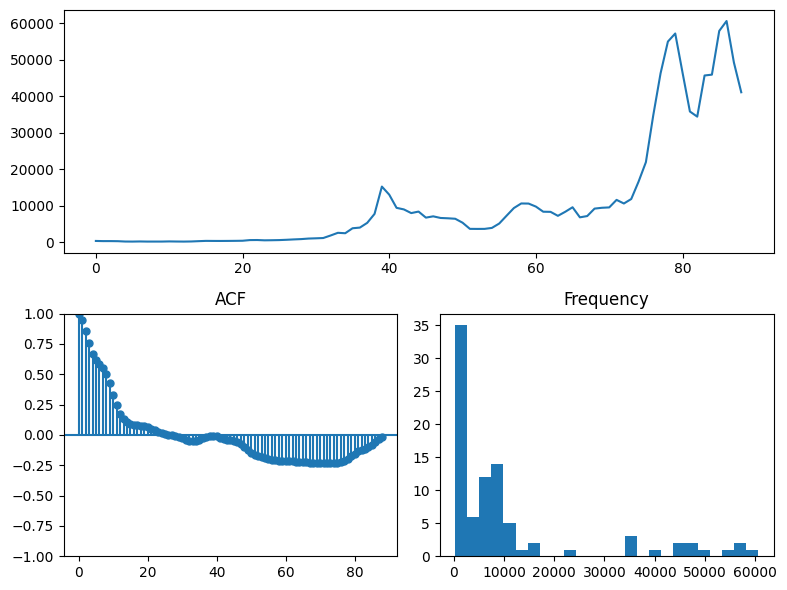

In [5]:
#Examining the data
tsdisplay(y_train, lag_max=len(y_train) - 1)

In [6]:
#Fitting a baseline
fit1 = pm.auto_arima(y_train, m=12, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1671.512, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1702.515, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1684.900, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1682.219, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1701.843, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1669.768, Time=0.22 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1667.821, Time=0.11 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1667.458, Time=0.43 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=1671.394, Time=0.60 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1673.241, Time=0.94 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=1686.254, Time=0.13 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=1678.119, Time=0.54 sec
 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=1681.356, Time=0.60 sec
 ARIMA(2,1,3)(1,0,0)[12] intercept   : AIC=1670.148, Time=0.99 sec
 ARIMA(1,1,1)(1,0,0

In [7]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   89
Model:             SARIMAX(2, 1, 2)x(1, 0, [], 12)   Log Likelihood                -826.729
Date:                             Wed, 20 Dec 2023   AIC                           1667.458
Time:                                     11:53:52   BIC                           1684.799
Sample:                                 09-01-2014   HQIC                          1674.444
                                      - 01-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    437.7463    384.678      1.138      0.255    -316.210    1191.702
ar.L1          1.2419      0.092     13.527      0.000       1.062       1.422
ar.L2         -0.9623      0.058    -16.728      0.000      -1.075      -0.850
ma.L1         -0.9034      0.133     -6.781      0.000      -1.164      -0.642
ma.L2          0.7912      0.083      9.550      0.000       0.629       0.954
ar.S.L12      -0.0516      0.210     -0.245      0.806      -0.463       0.360
sigma2      8.204e+06      0.037   2.19e+08      0.000     8.2e+06     8.2e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                55.17
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):              93.57   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.87e+23. Standard errors may be unstable.
"""

/usr/local/lib/python3.10/dist-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


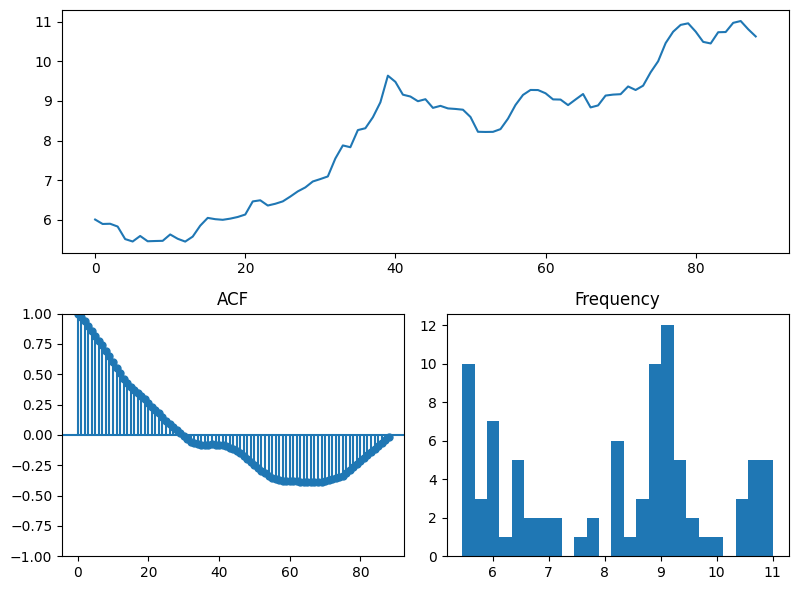

In [8]:
#Transforming our data
y_train_log, _ = LogEndogTransformer(lmbda=1e-6).fit_transform(y_train)
tsdisplay(y_train_log, lag_max=len(y_train) - 1)

/usr/local/lib/python3.10/dist-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


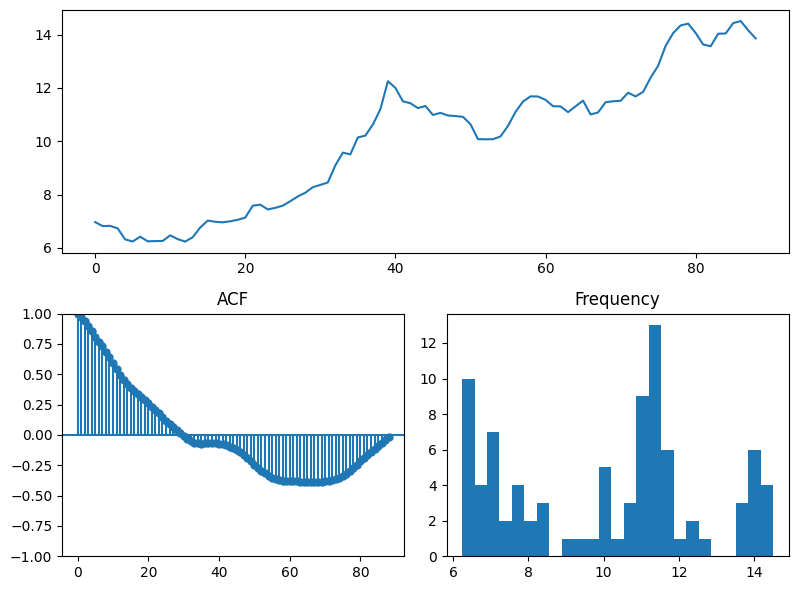

In [9]:
y_train_bc, _ = BoxCoxEndogTransformer(lmbda2=1e-6).fit_transform(y_train)
tsdisplay(y_train_bc, lag_max=len(y_train) - 1)

In [10]:
normaltest(y_train_bc)[1] # 3.751017646057429e-14

3.7443712341879546e-06

In [11]:
#Fitting the transformed data
fit2 = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),
    ('arima', pm.AutoARIMA(trace=True,
                           suppress_warnings=True,
                           m=12))
])

fit2.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=38.703, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=29.488, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=28.464, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=42.711, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=28.251, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=29.004, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=29.937, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=30.042, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=28.250, Time=0.03 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=29.195, Time=0.08 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=30.041, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.1

Pipeline(steps=[('boxcox', BoxCoxEndogTransformer(lmbda2=1e-06)),
                ('arima', AutoARIMA(m=12, trace=True))])

In [12]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   89
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 -11.125
Date:                Wed, 20 Dec 2023   AIC                             28.250
Time:                        11:53:55   BIC                             35.682
Sample:                             0   HQIC                            31.244
                                 - 89                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0472      0.033      1.420      0.156      -0.018       0.112
ar.L1          0.3658      0.083      4.402      0.000       0.203       0.529
sigma2         0.0753      0.011      6.984      0.000       0.054       0.096
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.36
Prob(Q):                              0.85   Prob(JB):                         0.84
Heteroskedasticity (H):               2.87   Skew:                             0.11
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
#Examining forecasts
def plot_forecasts(forecasts, title, figsize=(8, 12)):
    x = np.arange(y_train.shape[0] + forecasts.shape[0])

    fig, axes = plt.subplots(2, 1, sharex=False, figsize=figsize)

    # Plot the forecasts
    axes[0].plot(x[:y_train.shape[0]], y_train, c='b')
    axes[0].plot(x[y_train.shape[0]:], forecasts, c='g')
    axes[0].set_xlabel(f'Sunspots (RMSE={np.sqrt(mse(y_test, forecasts)):.3f})')
    axes[0].set_title(title)

    # Plot the residuals
    resid = y_test - forecasts
    _, p = normaltest(resid)
    axes[1].hist(resid, bins=15)
    axes[1].axvline(0, linestyle='--', c='r')
    axes[1].set_title(f'Residuals (p={p:.3f})')

    plt.tight_layout()
    plt.show()